# Práctica 6b: análisis de clustering de partición

## Clustering de partición
Método de agrupación utilizado para clasificar de manera no supervisada las observaciones, dentro de un conjunto de datos, en múltiples grupos basados en su similitud. Los algoritmos tienen la particularidad de requerir que se especifique el número de clústers que se van a generar:

   * K-means (MacQueen, 1967), en el cual, cada cluster está representado por el centro o medio de los puntos de datos pertenecientes al clúster. El método K-means es sensible a los puntos de datos anómalos y a los valores atípicos.
   * k-medoides o PAM (Partitioning Around Medoids, Kaufman & Rousseeuw, 1990), en el que cada cluster está representado por uno de los objetos reales del clúster. PAM es menos sensible a los valores atípicos en comparación con los k-medios.
   * CLARA (Clustering Large Applications), es una extensión de PAM adaptado para grandes conjuntos de datos.


Se usarán las siguientes librerías para calcular y visualizar el clustering de particiones:

   * stats para calcular K-means
   * cluster para ejecutar los algoritmos PAM y CLARA
   * factoextra para la visualización de los clusters

In [1]:
packages<-c("stats","cluster","factoextra")
lapply(packages,library,character.only= TRUE)

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


[[1]]
[1] "stats"     "graphics"  "grDevices" "utils"     "datasets"  "methods"  
[7] "base"     

[[2]]
[1] "cluster"   "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     

[[3]]
 [1] "factoextra" "ggplot2"    "cluster"    "stats"      "graphics"  
 [6] "grDevices"  "utils"      "datasets"   "methods"    "base"

## Ideas básicas de k-means
La idea básica detrás de k-means consiste en definir los clústers de manera que la variación total dentro del cluster (conocida como variación total dentro del cluster) sea minimizada. Hay varios algoritmos de k-means disponibles. El algoritmo estándar es el algoritmo Hartigan-Wong (1979), que define la variación total dentro del cluster como la suma de las distancias cuadradas de las distancias euclidianas entre los objetos y el correspondiente centroide:

$$W(Ck)=\sum_{xi∈Ck} (xi−μk)2$$


Donde:

 $x_{i}$ es un objeto perteneciente al cluster  $c_{k}$
 
 $m_{k}$ es el valor medio de los objetos agrupados en el clúster $c_{k}$


Inicialmente cada observación $x_{i}$ se asigna a un grupo dado, de tal forma que la suma de los cuadrados (sum of squares, SS) de la distancia de la observación al centro de su clúster asignado μk es un mínimo. Definimos la variación total dentro del clúster de la siguiente manera:

$$total within-cluster SS=\sum_{k=1}^{k}W(C_k)=\sum_{k=1}^{k}\sum_{xi∈Ck}(x_i−μ_k)2$$

La suma total de cuadrados dentro del clúster mide la compacidad de los clúster y queremos que sea lo más pequeño posible.


## k-means
   1. Especificar el número k de clústers.
   2. Objetos seleccionados al azar del conjunto de datos como los primeros centros de clustersormeans
   3. Asigna cada observación a su centroide más cercano, basándose en la distancia euclidiana entre el objeto y el centroide
   4. Para cada uno de los k clusters actualizar el centroide del cluster calculando los nuevos valores medios de todos los puntos de datos del cluster. El centroide de un cúmulo Kth es un vector de longitud p que contiene las medias de todas las variables para las observaciones en el cúmulo kth; p es el número de variables.
   5. Minimizar iterativamente el total dentro de la suma de los cuadrados. Es decir, iterar los pasos 3 y 4 hasta que las asignaciones del cúmulo dejen de cambiar o se alcance el número máximo de iteraciones. Por defecto, el software R utiliza 10 como valor de propuesta para el número máximo de iteraciones.

In [3]:
# Cargamos dataset
df <- read.csv("comprar_alquilar.csv")
#vemos las primeras 5 filas
head(df,n=5)

ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
6000,1000,0,600,50000,400000,0,2,2,1
6745,944,123,429,43240,636897,1,3,6,0
6455,1033,98,795,57463,321779,2,1,8,1
7098,1278,15,254,54506,660933,0,0,3,0
6167,863,223,520,41512,348932,0,0,3,1


In [4]:
#Hacemos los clusters con kmeans()
kmeans(df,3,iter.max=10,nstart = 1)

K-means clustering with 3 clusters of sizes 73, 41, 88

Cluster means:
  ingresos gastos_comunes pago_coche gastos_otros  ahorros vivienda
1 5251.753       993.0548   202.4932     518.3836 40556.70 384912.8
2 6478.146      1043.0488   194.5610     490.0488 55669.27 602517.2
3 4008.352       920.4773   227.4205     524.7955 29367.66 256986.2
  estado_civil     hijos  trabajo    comprar
1    0.9041096 1.2054795 4.287671 0.46575342
2    0.9512195 0.9512195 3.585366 0.09756098
3    1.1590909 1.3863636 5.079545 0.32954545

Clustering vector:
  [1] 1 2 1 2 1 1 1 2 3 1 2 1 2 1 2 3 1 2 2 3 1 2 2 3 1 1 1 2 1 3 1 2 2 2 1 1 1
 [38] 1 3 2 2 1 2 2 2 3 3 1 1 2 3 3 3 3 3 3 3 3 1 1 3 1 1 3 1 3 3 3 3 3 3 3 3 3
 [75] 1 3 3 3 1 3 1 3 3 1 3 3 3 3 3 3 1 3 3 3 1 3 3 1 1 3 1 1 2 1 1 2 2 3 2 1 1
[112] 2 1 1 3 2 1 3 2 2 2 1 1 2 1 1 2 3 3 1 3 1 2 1 2 1 2 1 3 2 1 1 3 1 2 2 2 1
[149] 2 2 2 3 3 3 1 1 1 1 3 3 3 1 3 1 1 3 3 3 3 3 1 3 3 3 1 3 1 3 3 3 3 1 3 3 3
[186] 3 3 3 1 3 3 3 1 3 3 3 3 1 3 1 1 3

Within cluster s

## Determinando el número óptimo de clústers
¿Cuál es el número óptimo de clústers en un conjunto de datos? Desafortunadamente, no hay una respuesta definitiva a esta pregunta. El número óptimo de clústers es de alguna manera subjetivo y depende del método utilizado para medir las similitudes y los parámetros utilizados para la partición.

Estos métodos incluyen métodos directos y métodos de pruebas estadísticas:

        1. Métodos directos: consisten en optimizar algún criterio, como las sumas de cuadrados dentro del clúster, métodos de codo (elbow), o o la silueta media, silueta media (average silhouette).
         

![](elbow.png)

    1. Métodos de prueba estadística: consiste en comparar la evidencia con la hipótesis nula. Un ejemplo es gap statistic.

Además del codo, la silueta y los métodos estadísticos, hay más de treinta otros índices y métodos que han sido publicados para identificar el número óptimo de clústers usando la "regla de la mayoría".

In [5]:
#Estandarizamos los datos
df <- scale(df)
head(df)

ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0.6185918,0.1044292,-1.69474384,0.50310952,0.6478653,0.19542468,-1.22404711,0.5609799,-0.9819801,1.4159627
1.0612899,-0.1013727,-0.71027724,-0.51412351,0.2585817,1.93256884,-0.02956636,1.2920633,0.5954353,-0.7027371
0.8889644,0.2257053,-0.91037208,1.66311210,1.0776321,-0.37816280,1.16491440,-0.1701036,1.3841430,1.4159627
1.2710515,1.1260885,-1.57468694,-1.55515146,0.9073493,2.10882265,-1.22404711,-0.9011870,-0.5876263,-0.7027371
0.7178275,-0.3990504,0.09010211,0.02721103,0.1590725,-0.17905232,-1.22404711,-0.9011870,-0.5876263,1.4159627
0.4355703,-0.2226488,-1.60670211,-1.13279155,0.6982534,-0.09156339,-0.02956636,2.0231467,0.2010814,1.4159627


In [6]:
#Eliminamos valores faltantes
df <- na.omit(df)

### fviz_nbclust
#### Determinación Y Visualización Del Número Óptimo De Clústeres
Los métodos de partición, como la agrupación de k-means requieren que los usuarios especifiquen el número de agrupaciones que se generarán.

fviz_nbclust (): Determina y visualiza el número óptimo de clústeres usando diferentes métodos: dentro de sumas de cuadrados de clúster , estadísticas promedio de silueta y brecha .

Warning message:
"package 'factoextra' was built under R version 3.6.3"Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa


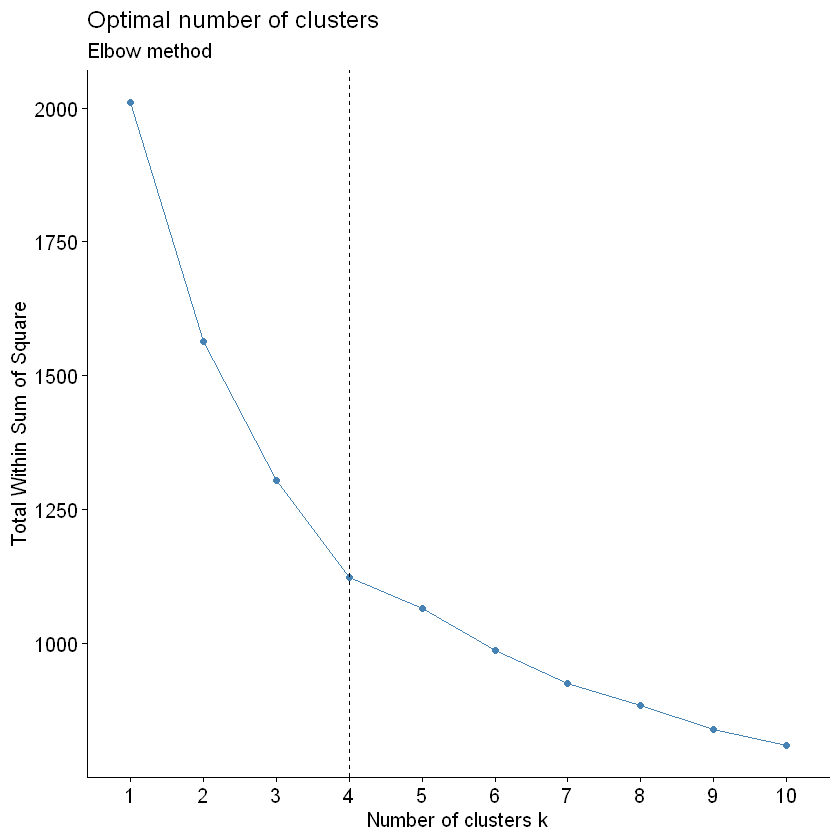

In [10]:
#Elbow mehod
library(factoextra)
fviz_nbclust(df,kmeans,method ="wss")+ geom_vline(xintercept= 4,linetype=2)+ labs(subtitle="Elbow method")

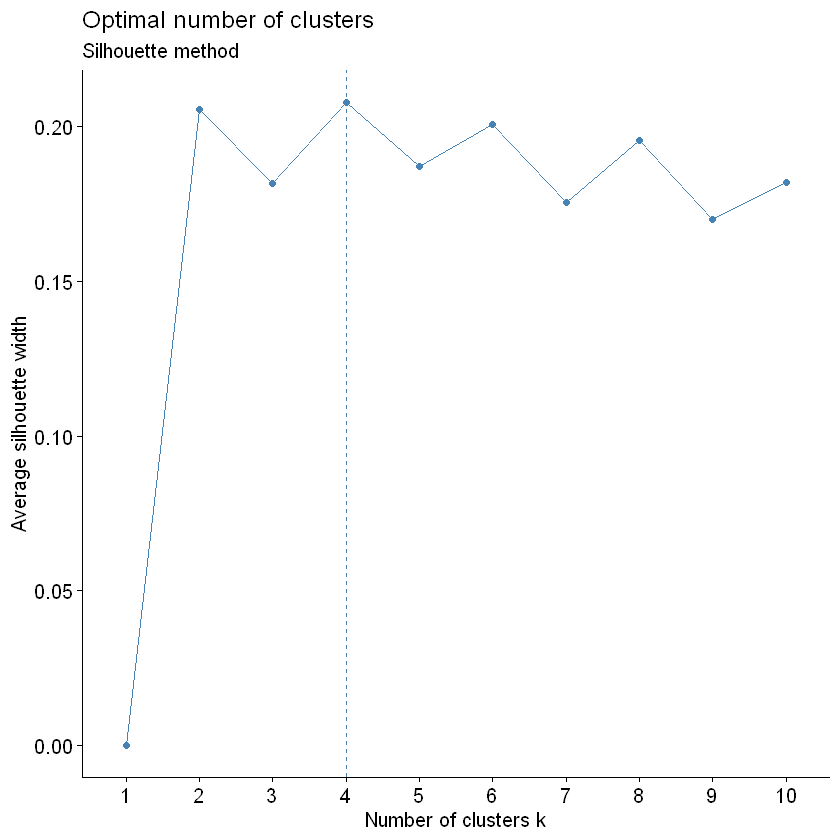

In [20]:
#Silhouette method
fviz_nbclust(df,kmeans,method="silhouette")+labs(subtitle="Silhouette method")